In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# Question 3


## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [2]:
image = cv2.imread('img_improvment.png', cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(output_image)

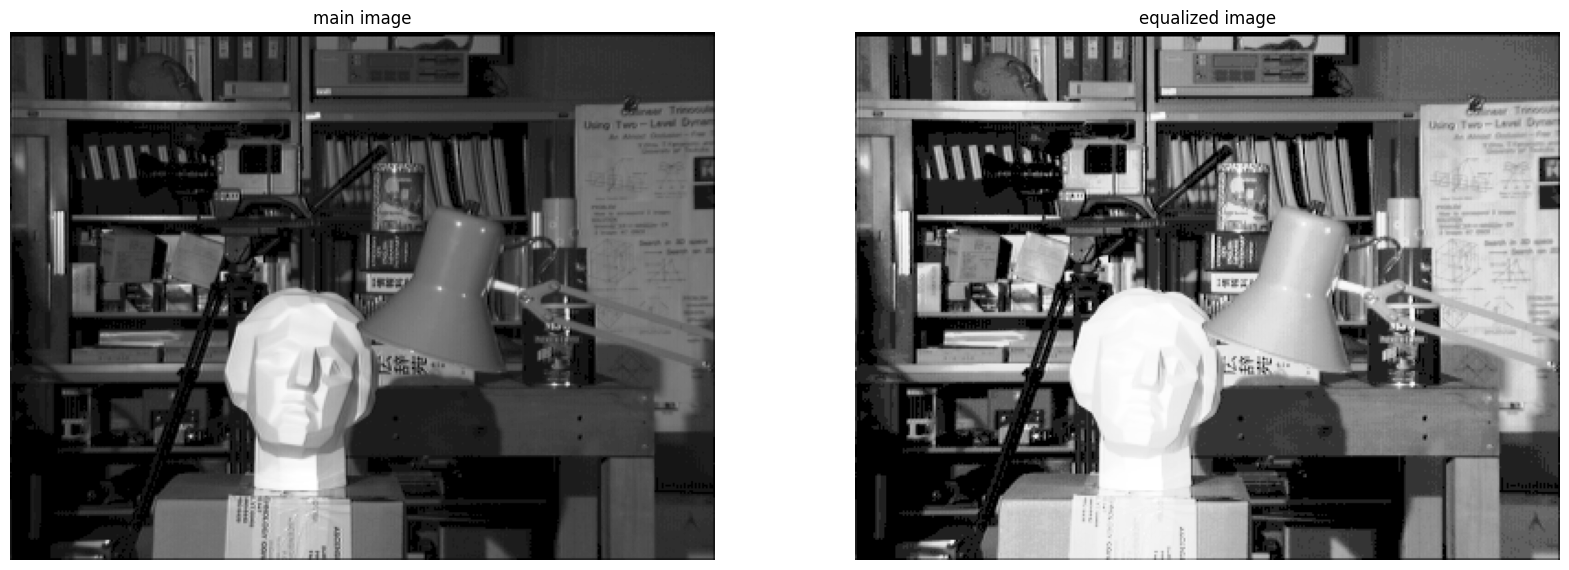

In [3]:
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')
plt.show()

## part b1


<h3> in this section we want to implement the first method for ACE (Adaptive Contrast Enhancement) </h3>
<h3> you are free to use opencv library </h3>


In [4]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x, y = image.shape
  print('x:', x, 'y:', y)
  output_image = image.copy()

  # Calculate the number of grids
  num_grid_x = x // gridSize
  num_grid_y = y // gridSize
  print('num_grid_x:', num_grid_x, 'num_grid_y:', num_grid_x)
  
  # Iterate through each grid
  for i in range(num_grid_x):
    for j in range(num_grid_y):
      # Define grid boundaries
      x_start = i * gridSize
      x_end = (i + 1) * gridSize
      y_start = j * gridSize
      y_end = (j + 1) * gridSize
      
      # Extract the grid
      grid = image[x_start:x_end, y_start:y_end]
      
      # Apply histogram equalization to the grid
      grid_equalized = cv2.equalizeHist(grid)
      
      # Update the output image with the equalized grid
      output_image[x_start:x_end, y_start:y_end] = grid_equalized

  return output_image

x: 288 y: 384
num_grid_x: 6 num_grid_y: 6


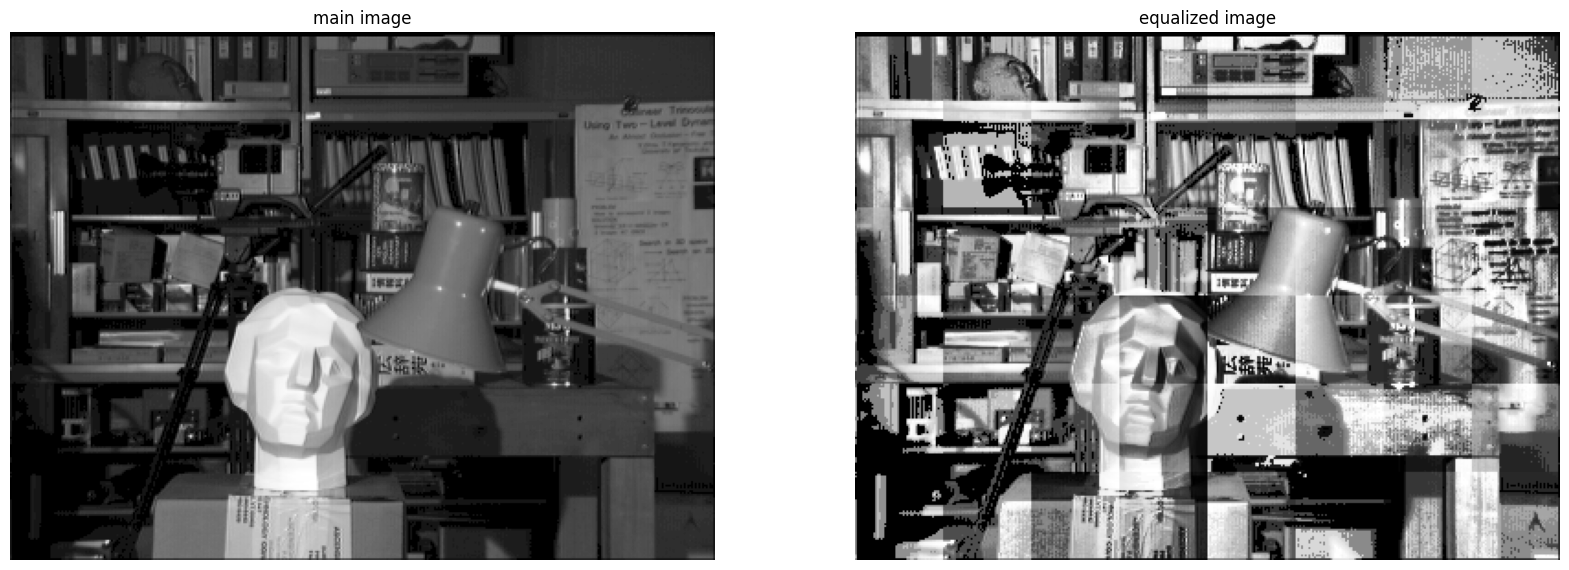

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image, 48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

plt.show()

Comparing

x: 288 y: 384
num_grid_x: 12 num_grid_y: 12
x: 288 y: 384
num_grid_x: 6 num_grid_y: 6
x: 288 y: 384
num_grid_x: 4 num_grid_y: 4


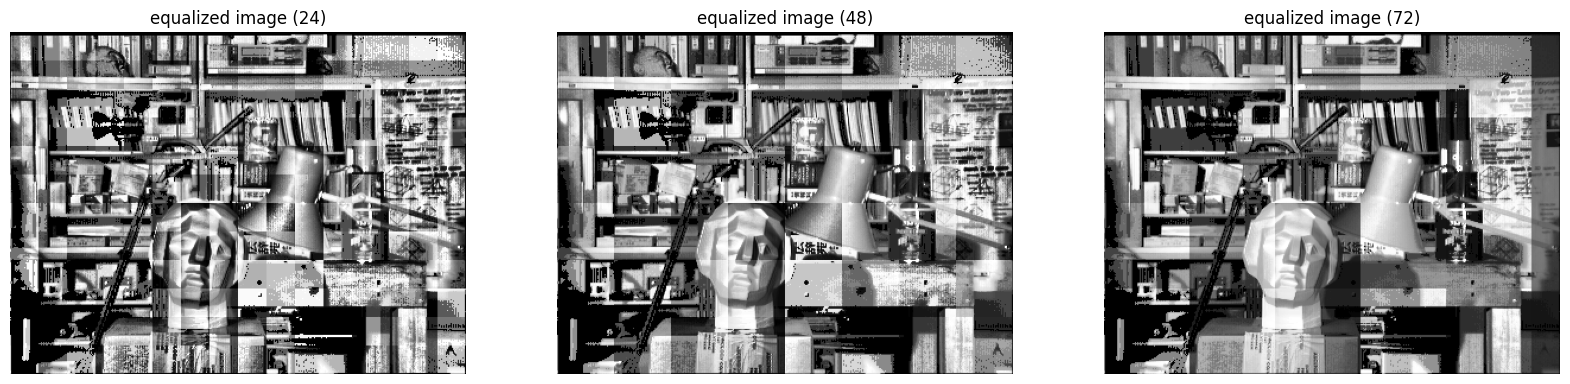

In [6]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
output_image = ACE1(image, 24)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image (24)')
plt.axis('off')

plt.subplot(1, 3, 2)
output_image = ACE1(image, 48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image (48)')
plt.axis('off')

plt.subplot(1, 3, 3)
output_image = ACE1(image, 72)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image (72)')
plt.axis('off')

plt.show()

## part b2

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you are free to use opencv library </h3>

In [7]:
def ACE2(image, gridSize):
    '''
    Perform adaptive contrast enhancement (ACE) on each pixel individually considering the given grid size.
    
    Inputs:
    - image (ndarray): Input image
    - gridSize (tuple): Window size for calculating histogram equalization
    
    Returns:
    - output (ndarray): Improved image
    '''
    output = image.copy()
    
    # Calculate padding size
    pad_x = gridSize[0] // 2
    pad_y = gridSize[1] // 2
    print('pad_x:', pad_x)
    print('pad_y:', pad_y)
    
    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(image, pad_x, pad_x, pad_y, pad_y, cv2.BORDER_REPLICATE)
    # padded_image = cv2.copyMakeBorder(image, pad_x, pad_x, pad_y, pad_y, cv2.BORDER_CONSTANT, value=0)

    # Iterate through each pixel
    rows, cols = image.shape
    print('image rows:', rows, 'image cols:', cols)
    
    pad_rows, pad_cols = padded_image.shape
    print('pad image rows:', pad_rows, 'pad image cols:', pad_cols)
    
    for i in range(rows):
      for j in range(cols):
        # print('image[i][j]:', image[i][j])  
          
        # Define grid boundaries
        x_start = i
        x_end = i + gridSize[0]
        y_start = j
        y_end = j + gridSize[1]
        
        # Extract the grid centered at the current pixel
        grid = padded_image[x_start:x_end, y_start:y_end]
        # print('grid:', grid)
        
        # Apply histogram equalization to the grid
        grid_equalized = cv2.equalizeHist(grid)
        # print('grid_equalized:', grid_equalized)
        
        # Update the output image with the equalized pixel
        output[i, j] = grid_equalized[gridSize[0] // 2, gridSize[1] // 2]
    
    return output


pad_x: 35
pad_y: 35
image rows: 288 image cols: 384
pad image rows: 358 pad image cols: 454


(-0.5, 383.5, 287.5, -0.5)

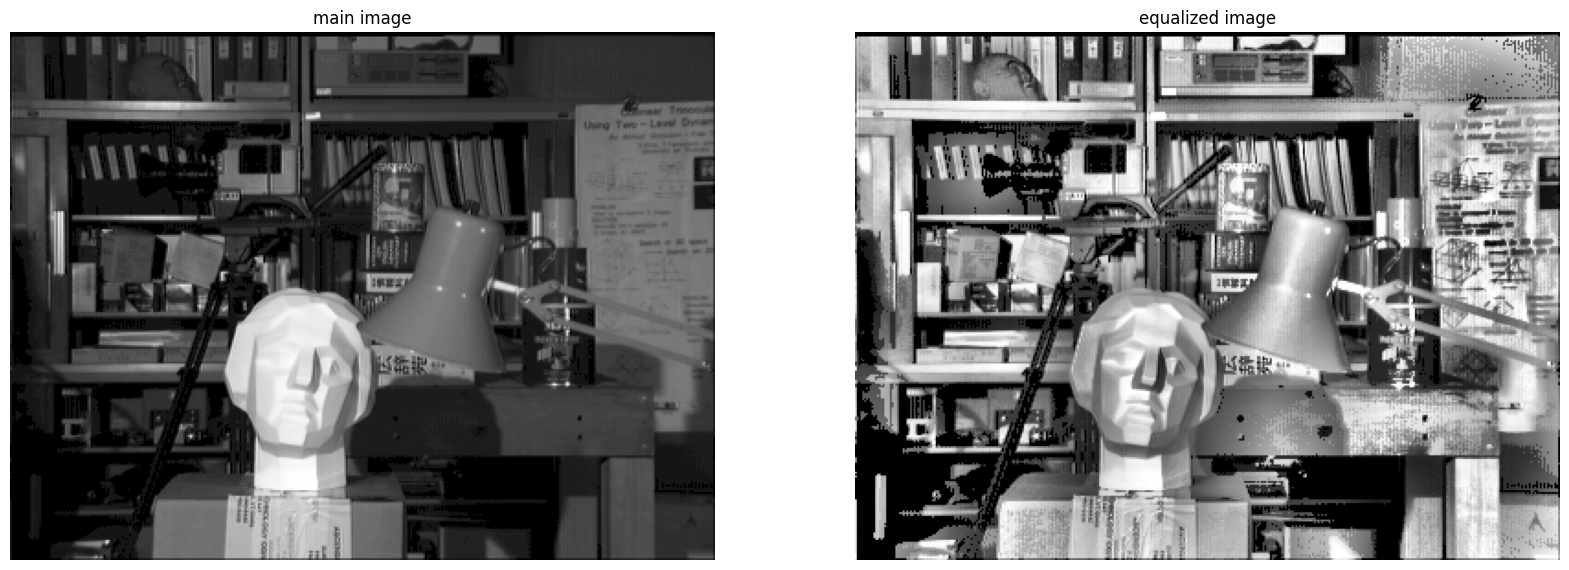

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1, 2, 2)
output_image = ACE2(image, (70, 70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b3

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [9]:
def CLAHE(image, gridSize, clip_limit):
    '''
    Perform Contrast Limited Adaptive Histogram Equalization (CLAHE) on the input image.

    Inputs:
      image (ndarray): Input image
      gridSize (tuple): Window size for calculating histogram equalization
      clip_limit (int): Threshold for contrast limiting

    Returns:
      output (ndarray): Improved image
    '''
    output = image.copy()
    
    # Calculate padding size
    pad_x = gridSize[0] // 2
    pad_y = gridSize[1] // 2
    
    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(image, pad_x, pad_x, pad_y, pad_y, cv2.BORDER_CONSTANT, value=0)

    # Calculate histogram for each grid
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            # Define grid boundaries
            x_start = i
            x_end = i + gridSize[0]
            y_start = j
            y_end = j + gridSize[1]
            
            # Extract the grid centered at the current pixel
            grid = padded_image[x_start:x_end, y_start:y_end]
            
            # Calculate histogram of the grid
            hist, _ = np.histogram(grid.flatten(), bins=256, range=(0, 256))
            
            # Clip histogram
            clipped_hist = np.clip(hist, 0, clip_limit)
            
            # Calculate cumulative distribution function (CDF)
            cdf = np.cumsum(clipped_hist)
            
            # Normalize CDF
            cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
            
            # Interpolate histogram equalization
            grid_equalized = np.interp(grid.flatten(), range(256), cdf_normalized).reshape(grid.shape)
            
            # Update the output image with the equalized pixel
            output[i, j] = grid_equalized[gridSize[0] // 2, gridSize[1] // 2]
    
    return output


(-0.5, 383.5, 287.5, -0.5)

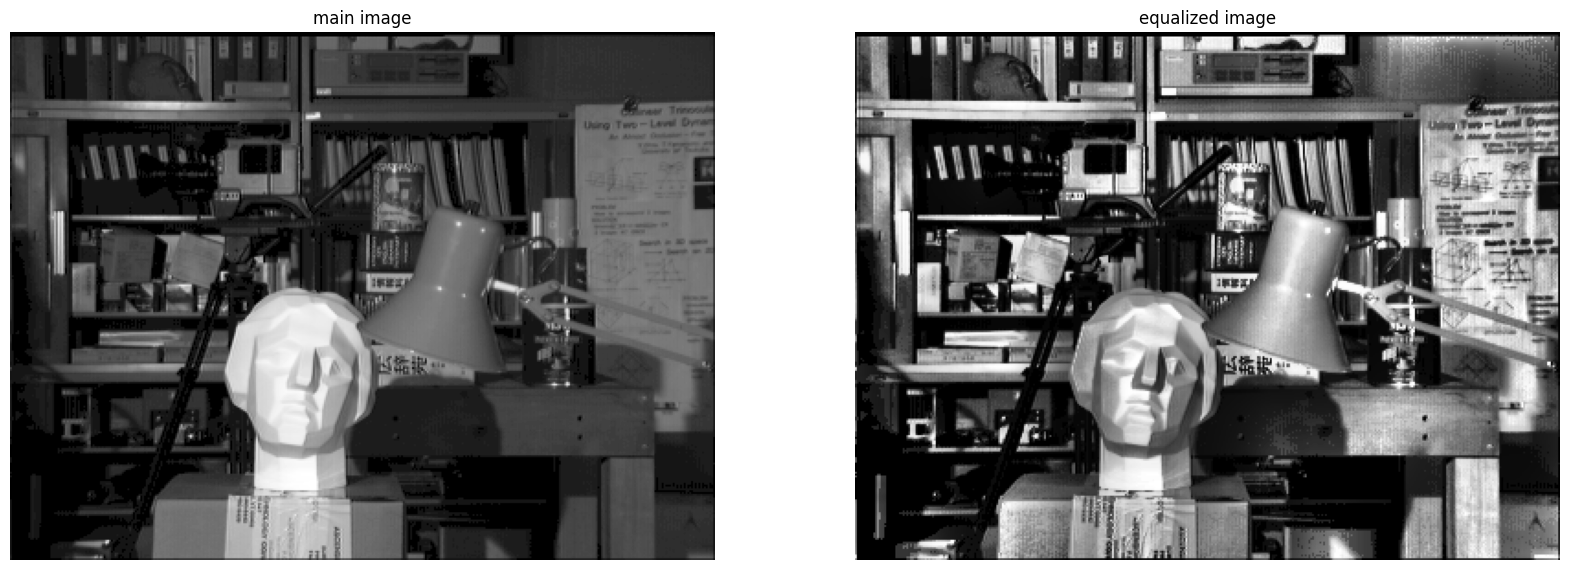

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image, (70, 70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

# part c


<h3> in this section we want to implement CLAHE using opencv </h3>


In [14]:
def CLAHE_cv2(image, gridSize, clipLimit):
    '''
    use opencv library for CLAHE.
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_Limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=gridSize)
    
    # Apply CLAHE to the input grayscale image
    output_image = clahe.apply(image)
    
    return output_image

<h3> run the following sections to answer part c </h3>


(-0.5, 383.5, 287.5, -0.5)

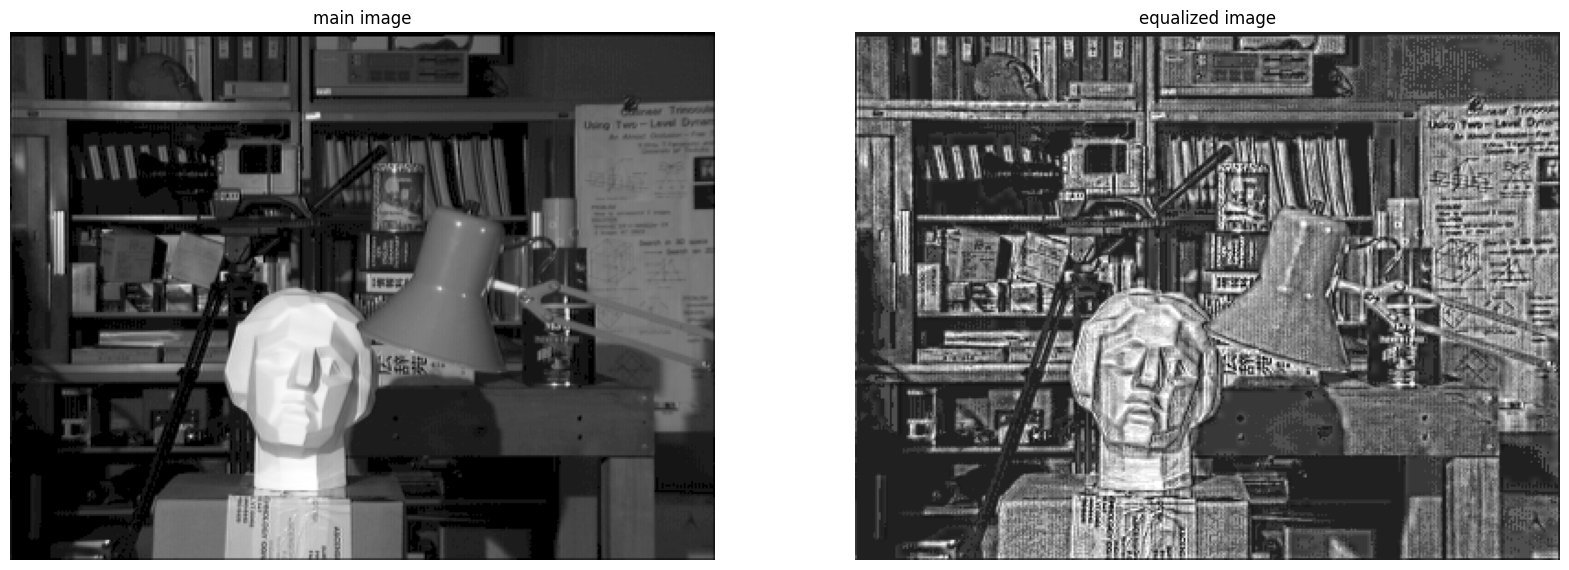

In [15]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image1 = CLAHE_cv2(image,(128,128), 2)
plt.imshow(output_image1, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

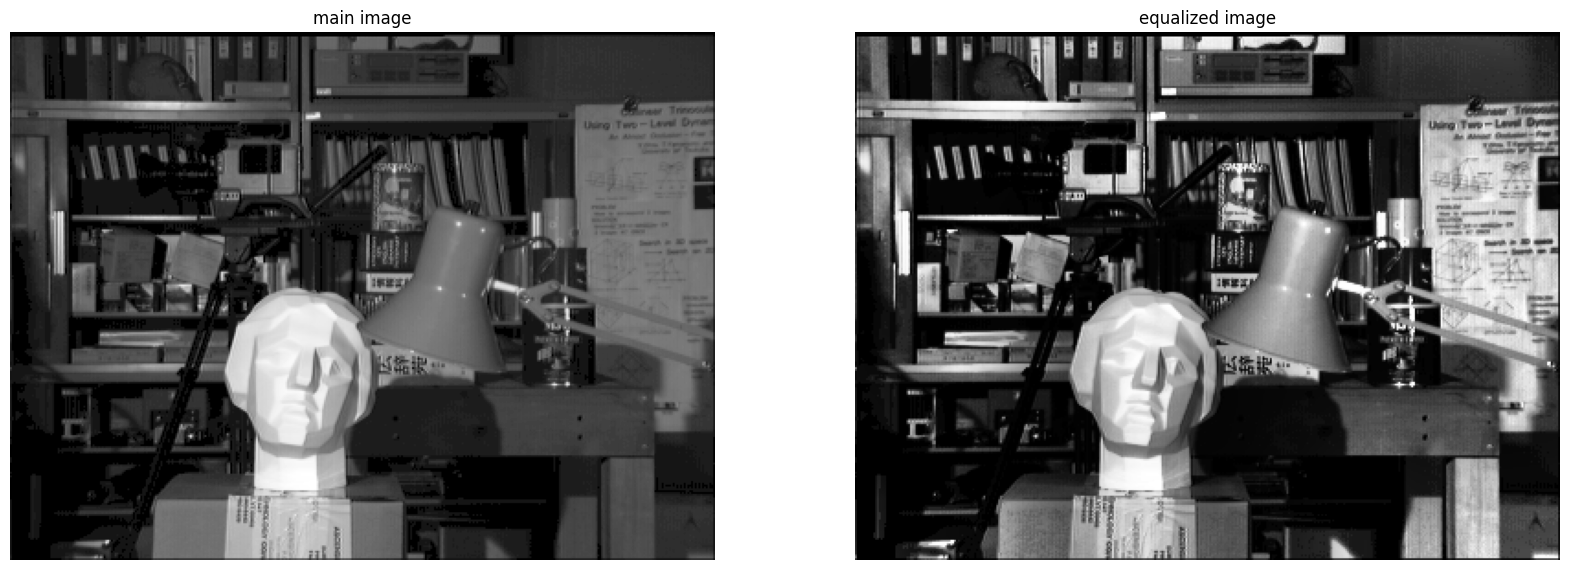

In [16]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image2 = CLAHE(image,(128,128), 128)
plt.imshow(output_image2, cmap='gray')
plt.title('equalized image')
plt.axis('off')

c:\Python37\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


(-0.5, 383.5, 287.5, -0.5)

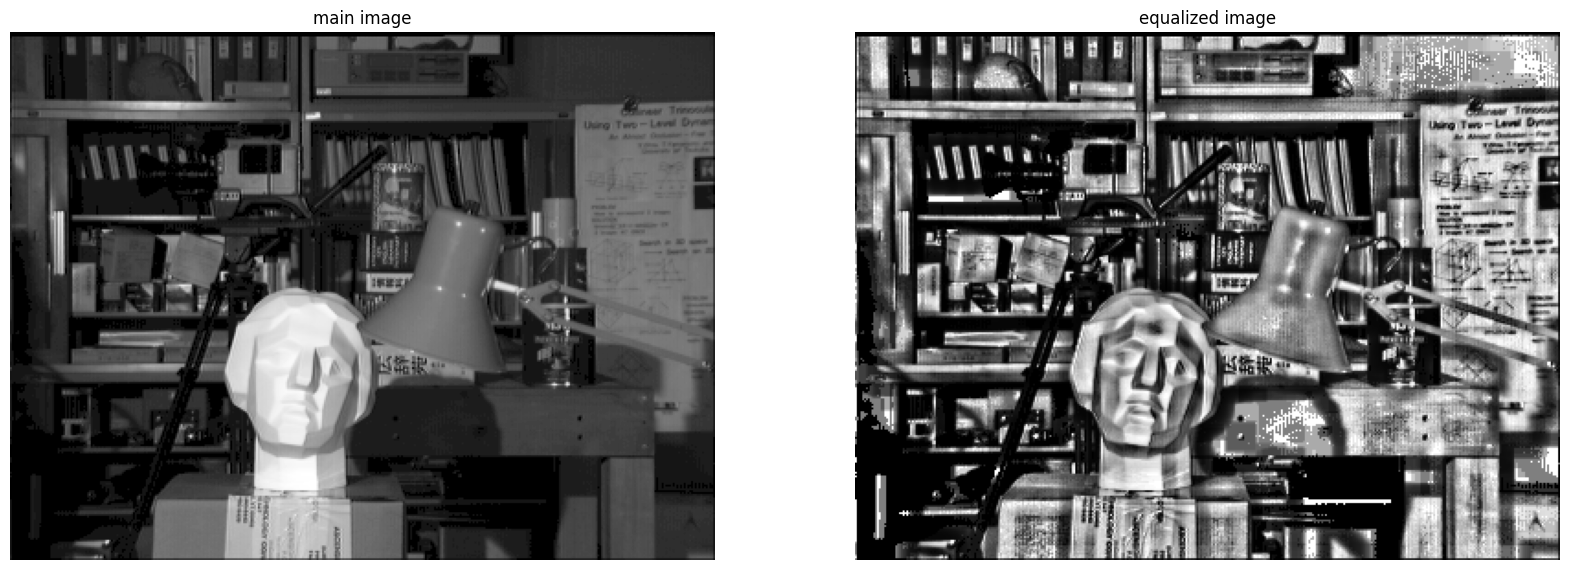

In [17]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image3 = CLAHE(image,(16,16), 2)
plt.imshow(output_image3, cmap='gray')
plt.title('equalized image')
plt.axis('off')

c:\Python37\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


(-0.5, 383.5, 287.5, -0.5)

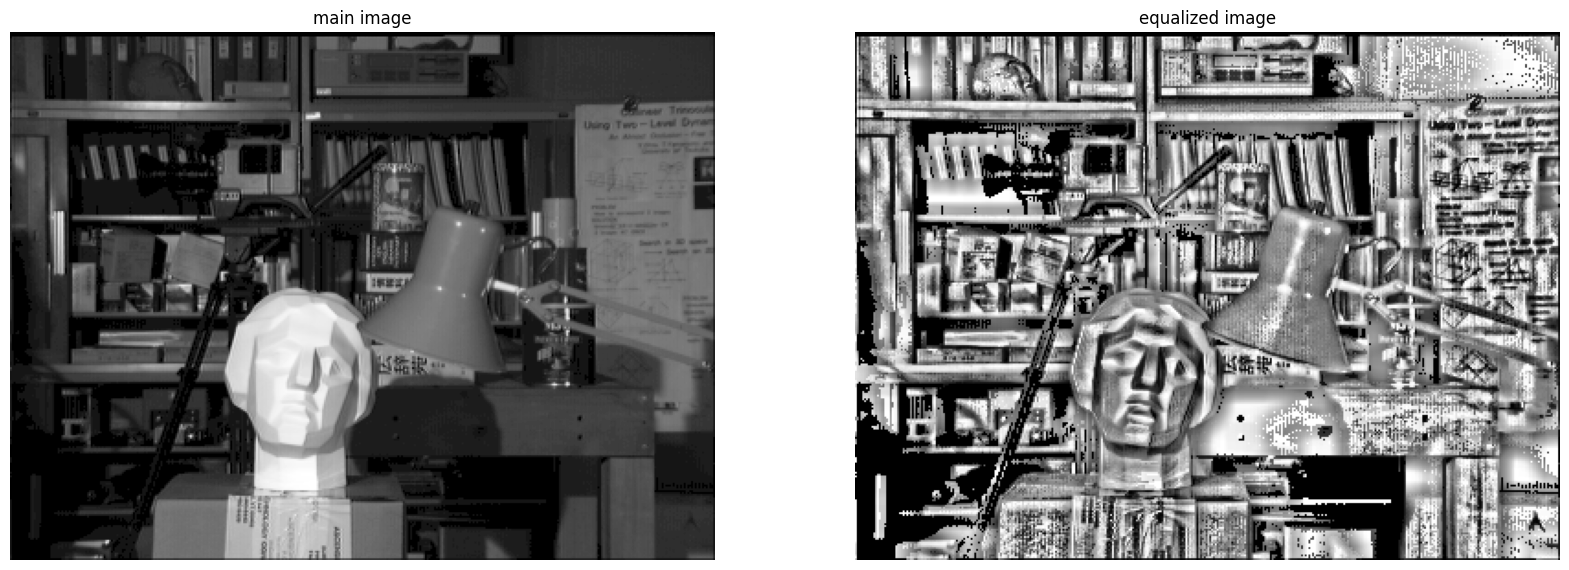

In [18]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image4 = CLAHE(image,(16,16), 128)
plt.imshow(output_image4, cmap='gray')
plt.title('equalized image')
plt.axis('off')